7. Optimize This 0 points

Welcome to the QHack 2023 daily challenges! Every day for the next four days, you will receive two new challenges to complete. These challenges are worth no points — they are specifically designed to get your brain active and into the right mindset for the competition. You will also learn about various aspects of PennyLane that are essential to quantum computing, quantum machine learning, and quantum chemistry. Have fun!

Tutorial #7 — Quantum machine learning
Quantum machine learning is an area of research that explores the interplay between quantum computing and machine learning. Quantum machine learning models might offer significant speedups for performing certain tasks like classification, image processing, and regression.

In this challenge, you'll learn the meat and potatoes of training a quantum machine learning model. Specifically, you will implement a procedure for embedding classical numbers into a quantum computer, construct a simple quantum machine learning model, and perform three optimization steps. The quantum circuit in the model that you will implement looks like this:
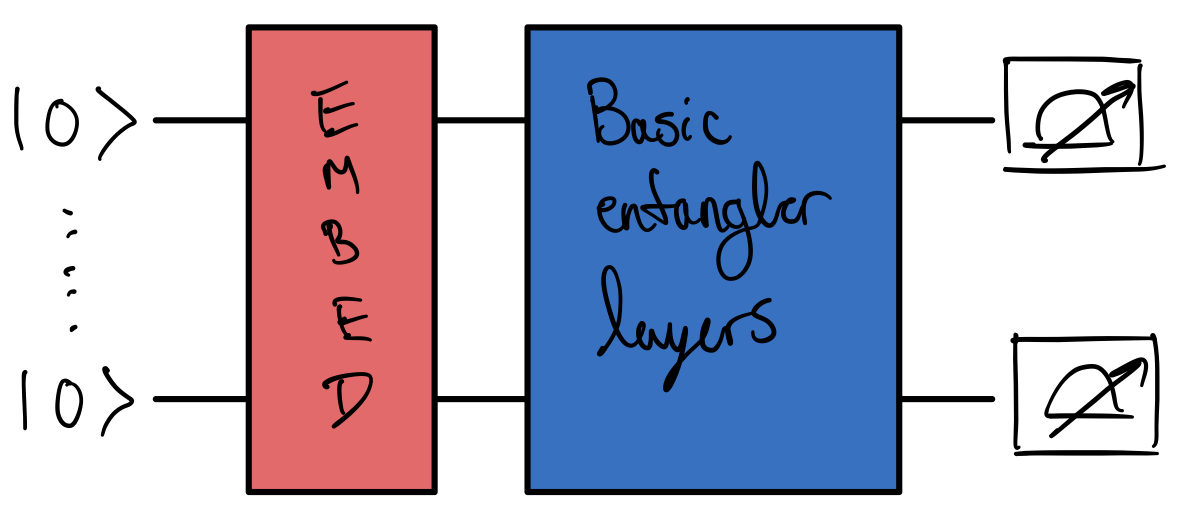

**Challenge code**
In the code below, you must complete the following functions:

- three_optimization_steps: performs three optimization steps. You must complete this function.
- cost: this is within the three_optimization_steps function. You must complete this function. cost is a QNode that does a few things:
    - acts on 3 qubits only;
    - embeds the input data via amplitude embedding;
    - defines some differentiable gates via a template called [qml.BasicEntanglerLayers](https://docs.pennylane.ai/en/stable/code/api/pennylane.BasicEntanglerLayers.html); and
    - returns the expectation value of $ \sum_{i=1}^n Z_i $, where $n$ is the number of qubits.

Within the three_optimization_steps function is a variable called weights. These are the changeable parameters that help define the qml.BasicEntanglerLayers template that you must put in the cost function. weights are the parameters that will be optimized (and need to be referred to by this name due to the final call return cost(weights, data=data), which cannot be edited).

To perform three optimization steps, use a gradient decent optimizer — qml.GradientDescentOptimizer — with a step size of $0.01$.

Here are some helpful resources:

[Optimizing a quantum circuit — YouTube video](https://youtu.be/TiQ7T1h8VAQ)

[Basic tutorial: qubit rotation — Optimization](https://pennylane.ai/qml/demos/tutorial_qubit_rotation.html#optimization)

**Input**

As input to this problem, you are given classical data (list(float)) that you must embed into a quantum circuit via [amplitude embedding](https://docs.pennylane.ai/en/stable/code/api/pennylane.AmplitudeEmbedding.html).

**Output**
This code must output the evaluation of cost after three optimization steps have been performed.

If your solution matches the correct one within the given tolerance specified in check (in this case it's a 1e-4 relative error tolerance), the output will be "Correct!" Otherwise, you will receive a "Wrong answer" prompt.

Good luck!

Code

In [ ]:
import json
import pennylane as qml
import pennylane.numpy as np

def three_optimization_steps(data):
    """Performs three optimization steps on a quantum machine learning model.

    Args:
        data (list(float)): Classical data that is to be embedded in a quantum circuit.

    Returns:
        (float): The cost function evaluated after three optimization steps.
    """

    normalize = np.sqrt(np.sum(data[i] ** 2 for i in range(len(data))))
    data /= normalize

    dev = qml.device("default.qubit", wires=3)

    @qml.qnode(dev)
    def cost(weights, data=data):
        """A circuit that embeds classical data and has quantum gates with tunable parameters/weights.

        Args:
            weights (numpy.array): An array of tunable parameters that help define the gates needed.

        Kwargs:
            data (list(float)): Classical data that is to be embedded in a quantum circuit.

        Returns:
            (float): The expectation value of the sum of the Pauli Z operator on every qubit.
        """


        # Put your code here #

        return


    # initialize the weights
    shape = qml.BasicEntanglerLayers.shape(n_layers=2, n_wires=dev.num_wires)
    weights = np.array([0.1, 0.2, 0.3, 0.4, 0.5, 0.6], requires_grad=True).reshape(
        shape
    )


    # Put your code here #

    # Define a gradient descent optimizer with a step size of 0.01

    # Optimize the cost function for three steps


    return cost(weights, data=data)


# These functions are responsible for testing the solution.
def run(test_case_input: str) -> str:
    data = json.loads(test_case_input)
    cost_val = three_optimization_steps(data)
    return str(cost_val)

def check(solution_output: str, expected_output: str) -> None:
    solution_output = json.loads(solution_output)
    expected_output = json.loads(expected_output)
    assert np.allclose(solution_output, expected_output, rtol=1e-4)


test_cases = [['[1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0]', '0.066040']]

for i, (input_, expected_output) in enumerate(test_cases):
    print(f"Running test case {i} with input '{input_}'...")

    try:
        output = run(input_)

    except Exception as exc:
        print(f"Runtime Error. {exc}")

    else:
        if message := check(output, expected_output):
            print(f"Wrong Answer. Have: '{output}'. Want: '{expected_output}'.")

        else:
            print("Correct!")